### Identifying sets of metrics

We have some sets of metrics "pre-packaged" if you will, to look at what seems to be the interesting to compare summary stats between different runs, for some science goals. 
This notebook gives some examples of finding new sets of metrics to add to those packages, for comparing between runs. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorcet
from IPython.display import display
import rubin_sim.maf as maf

In [3]:
# Download the information on the families - this helps us load up related sets of simulations,
# while progressing in expected impact through survey simulation variations within each family.
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/runs_v2.1.json'
source = 'runs_v2.1.json'
families = maf.archive.get_family_descriptions(source)
family_list = families.index.values

In [4]:
# Download the summary csv file -- note that metric names may change between major updates in the CSV file
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/summary_2022_04_28.csv'
summary_source = 'summary_2022_04_28.csv'
summaries = maf.get_metric_summaries(summary_source=summary_source)

In [5]:
# Load the existing metric definition file -- this is what we'd like to update
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/metric_sets.json'
metrics_source = 'metric_sets.json'
metric_set = maf.get_metric_sets(metrics_source)

So what's the problem?
First - the metric sets may have older names for the metric outputs (maybe the summary statistic changed, maybe the metric itself was updated) or it very likely just doesn't include a set that matches what you want to compare. 
The metric_set dataframe isn't required for use with the summaries dataframe, but it makes life easier.
The metric_set dataframe can be used with the functions in `maf.summary_plots` to normalize the dataframe automatically (including inverting columns that should be inverted, and treating as magnitudes those that should be magnitudes), as well as to set linestyles, short cuts for the metric names, and prettier plots. 
See this [archive + summary_plots tutorial](https://github.com/lsst/rubin_sim_notebooks/blob/main/maf/tutorial/04_Getting_Data.ipynb) for extra information.

Let's try to identify some more sets to work into the pre-packaged metric_sets file. 

In [6]:
# First update the older metric_sets - make sure the metrics match the current names
msets = list(metric_set.groupby('metric set').first().index)
msets

for k in msets:
    print(k, len(metric_set.loc[k]))
    summaries.loc[:, metric_set.loc[k]['metric']]

AGN SF 12
AGN timelag 12
Fraction Pop 3 bands 14
Fraction Pop 4 bands 14
Fraction Pop 5 bands 14
Fraction Pop 6 bands 14
Lightcurve Inversion 8
N QSO 6
Nvis 9
SSO NOBJ 6
SSO discovery 14
area 5
cadence 8
descWFD 9
galaxies 1
microlensing all 27
microlensing short 4
radar 13
short 10
srd 5
sso disc options 22
tvs 5


Set up a new metric set and look at the outputs

In [7]:
# This is an example - which could be modified! -- of putting together quite a lot of metrics.
# Note how the lines in the first plot become hard to follow, so the mesh grid in the second option is better
# For fewer metrics, the linestyle plot can show more detail
metrics = [f"Median CoaddM5 WFD {f} band HealpixSubsetSlicer" for f in 'ugrizy']
metrics += [f"Mean Median fiveSigmaDepth WFD {f} band HealpixSubsetSlicer" for f in 'ugrizy']
metrics += [f"Median NVisits WFD {f} band HealpixSubsetSlicer" for f in 'ugrizy']
metrics += [f"Mean Median Inter-Night Gap WFD {f} band HealpixSubsetSlicer" for f in 'ugrizy']
short_names = [f"Median coadd depth {f} WFD" for f in 'ugrizy']
short_names += [f"Median single image depth {f} WFD" for f in 'ugrizy']
short_names += [f"Median NVisits {f} WFD" for f in 'ugrizy']
short_names += [f"Median Internight Gap {f} WFD" for f in 'ugrizy']
styles = (['c-', 'g-', 'y-', 'r-', 'm-', 'k-'] + ['c-.', 'g-.', 'y-.', 'r-.', 'm-.', 'k-.']
          + ['c:', 'g:', 'y:', 'r:', 'm:', 'k:'] + ['c--', 'g--', 'y--', 'r--', 'm--', 'k--'])
mags = [True]*6 + [True]*6 + [False]*6 + [False]*6
invert = [False]*6*3 + [True]*6
new = maf.create_metric_set_df('wfd', metrics, short_names, style=styles, mag=mags, invert=invert)
new

metric  \
metric set metric                                                                                                  
wfd        Median CoaddM5 WFD u band HealpixSubsetSlicer           Median CoaddM5 WFD u band HealpixSubsetSlicer   
           Median CoaddM5 WFD g band HealpixSubsetSlicer           Median CoaddM5 WFD g band HealpixSubsetSlicer   
           Median CoaddM5 WFD r band HealpixSubsetSlicer           Median CoaddM5 WFD r band HealpixSubsetSlicer   
           Median CoaddM5 WFD i band HealpixSubsetSlicer           Median CoaddM5 WFD i band HealpixSubsetSlicer   
           Median CoaddM5 WFD z band HealpixSubsetSlicer           Median CoaddM5 WFD z band HealpixSubsetSlicer   
           Median CoaddM5 WFD y band HealpixSubsetSlicer           Median CoaddM5 WFD y band HealpixSubsetSlicer   
           Mean Median fiveSigmaDepth WFD u band HealpixSu...  Mean Median fiveSigmaDepth WFD u band HealpixS...   
           Mean Median fiveSigmaDepth WFD g band HealpixSu...  Mean Median fiveSigmaDepth WFD g band HealpixS...   
           Mean Median fiveSigmaDepth WFD r band HealpixSu...  Mean Median fiveSigmaDepth WFD r band HealpixS...   
           Mean Median fiveSigmaDepth WFD i band HealpixSu...  Mean Median fiveSigmaDepth WFD i band HealpixS...   
           Mean Median fiveSigmaDepth WFD z band HealpixSu...  Mean Median fiveSigmaDepth WFD z band HealpixS...   
           Mean Median fiveSigmaDepth WFD y band HealpixSu...  Mean Median fiveSigmaDepth WFD y band HealpixS...   
           Median NVisits WFD u band HealpixSubsetSlicer           Median NVisits WFD u band HealpixSubsetSlicer   
           Median NVisits WFD g band HealpixSubsetSlicer           Median NVisits WFD g band HealpixSubsetSlicer   
           Median NVisits WFD r band HealpixSubsetSlicer           Median NVisits WFD r band HealpixSubsetSlicer   
           Median NVisits WFD i band HealpixSubsetSlicer           Median NVisits WFD i band HealpixSubsetSlicer   
           Median NVisits WFD z band HealpixSubsetSlicer           Median NVisits WFD z band HealpixSubsetSlicer   
           Median NVisits WFD y band HealpixSubsetSlicer           Median NVisits WFD y band HealpixSubsetSlicer   
           Mean Median Inter-Night Gap WFD u band HealpixS...  Mean Median Inter-Night Gap WFD u band Healpix...   
           Mean Median Inter-Night Gap WFD g band HealpixS...  Mean Median Inter-Night Gap WFD g band Healpix...   
           Mean Median Inter-Night Gap WFD r band HealpixS...  Mean Median Inter-Night Gap WFD r band Healpix...   
           Mean Median Inter-Night Gap WFD i band HealpixS...  Mean Median Inter-Night Gap WFD i band Healpix...   
           Mean Median Inter-Night Gap WFD z band HealpixS...  Mean Median Inter-Night Gap WFD z band Healpix...   
           Mean Median Inter-Night Gap WFD y band HealpixS...  Mean Median Inter-Night Gap WFD y band Healpix...   

                                                                                    short_name  \
metric set metric                                                                                
wfd        Median CoaddM5 WFD u band HealpixSubsetSlicer              Median coadd depth u WFD   
           Median CoaddM5 WFD g band HealpixSubsetSlicer              Median coadd depth g WFD   
           Median CoaddM5 WFD r band HealpixSubsetSlicer              Median coadd depth r WFD   
           Median CoaddM5 WFD i band HealpixSubsetSlicer              Median coadd depth i WFD   
           Median CoaddM5 WFD z band HealpixSubsetSlicer              Median coadd depth z WFD   
           Median CoaddM5 WFD y band HealpixSubsetSlicer              Median coadd depth y WFD   
           Mean Median fiveSigmaDepth WFD u band HealpixSu...  Median single image depth u WFD   
           Mean Median fiveSigmaDepth WFD g band HealpixSu...  Median single image depth g WFD   
           Mean Median fiveSigmaDepth WFD r band HealpixSu...  Median single image depth r WFD   
           

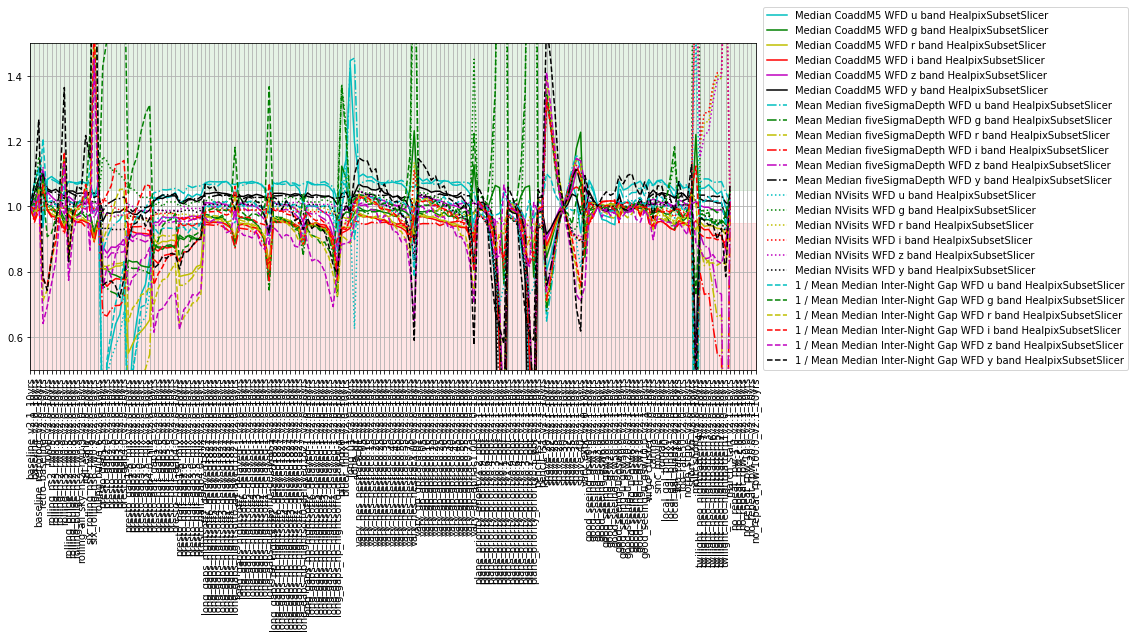

In [8]:
k = 'wfd'

fams = [f for f in family_list if not f.startswith('ddf')]

these_runs = families.explode('run').loc[fams]['run']
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, new.loc[k]['metric']], 
                              baseline_run='baseline_v2.1_10yrs',
                              metric_set=new.loc[k],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(13)
ax.set_ylim(0.5, 1.5)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')

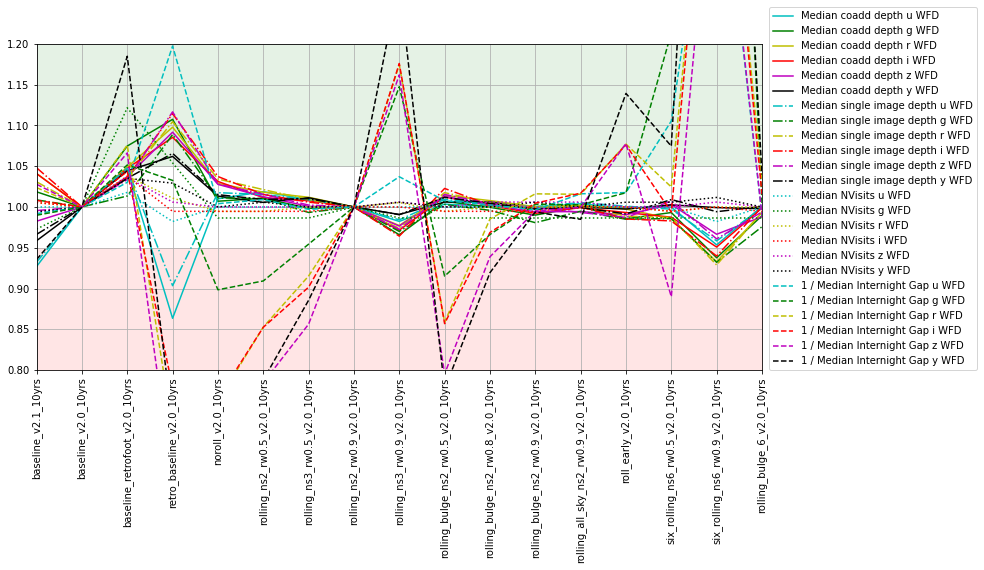

In [9]:
# Maybe look closer at some families 
k = 'wfd'
fams = ['baseline', 'rolling']
these_runs = families.explode('run').loc[fams]['run']
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, new.loc[k]['metric']], 
                              baseline_run='baseline_v2.0_10yrs',
                              metric_set=new.loc[k],
                              metric_label_map=new.loc[k, 'short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(13)
ax.set_ylim(0.8, 1.2) #ax.set_xlim(0.5, 2)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')

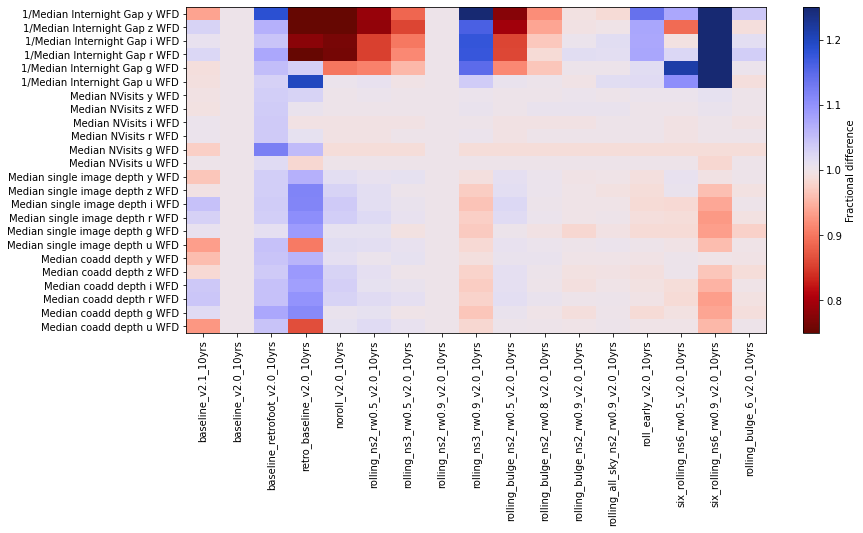

In [12]:
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, new.loc[k]['metric']],
                                 baseline_run='baseline_v2.0_10yrs', 
                                  metric_label_map=new.loc[k]['short_name'],
                                   metric_set=new.loc[k],
                                  color_range=0.5,
                                   cmap=colorcet.cm['CET_D1A_r'])
                                  #cmap=colorcet.cm['CET_R3_r'])
fig.set_figwidth(13)

In [13]:
# Add this new set back into the metric_sets if desired 
tmp = pd.concat([metric_set, new])
maf.write_metric_sets('metric_set_new.json', tmp)

In [14]:
# Check the new file is readable
metrics_source = 'metric_set_new.json'
nn = maf.get_metric_sets(metrics_source)

In [15]:
list(nn.groupby('metric set').first().index)

['AGN SF',
 'AGN timelag',
 'Fraction Pop 3 bands',
 'Fraction Pop 4 bands',
 'Fraction Pop 5 bands',
 'Fraction Pop 6 bands',
 'Lightcurve Inversion',
 'N QSO',
 'Nvis',
 'SSO NOBJ',
 'SSO discovery',
 'area',
 'cadence',
 'descWFD',
 'galaxies',
 'microlensing all',
 'microlensing short',
 'radar',
 'short',
 'srd',
 'sso disc options',
 'tvs',
 'wfd']